<a href="https://colab.research.google.com/github/SylvainRo/Phys_Informing_ML/blob/main/Model_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 1.0343
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8700
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.8574
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8625
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8609
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8561
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8569
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.8529
Epoch 9/10
625/625 [==============================] - 2s 4ms/step - loss: 0.8551
Epoch 10/10
625/625 [==============================] - 1s 2ms/step


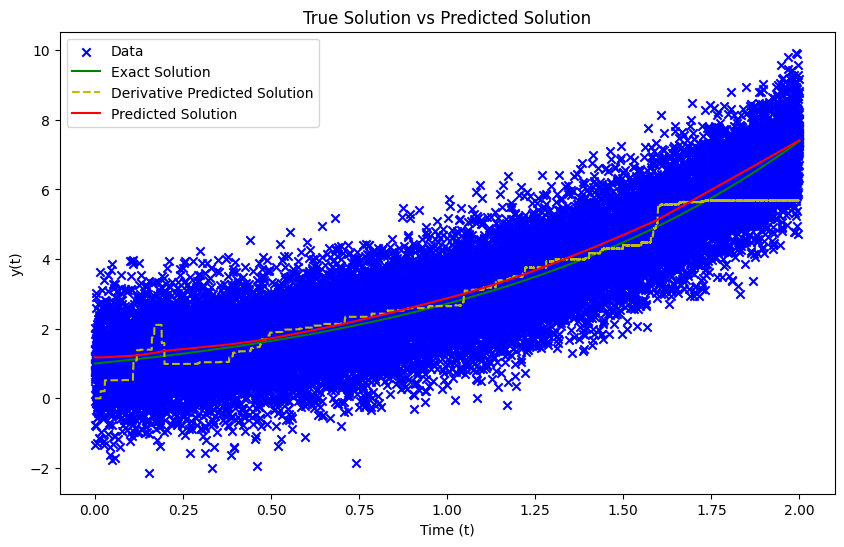

0.07187517361705398
[-0.90244766  1.        ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import null_space

import tensorflow as tf
from tensorflow.keras import layers, models

# True function
start = 0.0
stop = 2.0
N = 20000
t = np.linspace(start,stop,N)
y = np.exp(t)
delta = t[1] - t[0]

# Fake data
y_data = np.exp(t) + np.random.normal(0, 0.9, N)

# Define a simple neural network architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(t, y_data, epochs=10);

# Use the trained model
y_pred = model.predict(t)
y_pred = np.array(y_pred).reshape((len(t),))

# First derivative
def der(x):
  der1 = np.zeros(len(x))
  der1[0] = (x[1] - x[0])/delta
  der1[-1] = (x[-1] - x[-2])/delta
  for i in range(len(x)-2):
    der1[i+1] = (x[i+2] - x[i]) / (2 * delta)
  return der1

# First derivative of the data at given datapoints
y_1 = der(y_pred)


# Plots
plt.figure(figsize=(10, 6))
plt.scatter(t,y_data,label='Data',color='blue', marker = "x")
plt.plot(t,y,label='Exact Solution',color='green')
plt.plot(t,y_1,label='Derivative Predicted Solution',color='y',linestyle='--')
plt.plot(t,y_pred,label='Predicted Solution',color='red')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('True Solution vs Predicted Solution')
plt.show()


# Differential Equation Coefficient Prediction (Using prediction and its derivative)
Null = np.zeros((len(t),2))


for i in range(len(t)):
  Null[i] = null_space([[y_pred[i],y_1[i]]]).reshape(2,)


print(Null[1:-1,0].mean() + Null[1:-1,1].mean())

coef = np.array([Null[1:-1,0].mean(),Null[1:-1,1].mean()]) * (1/Null[1:-1,1].mean())

print(coef)

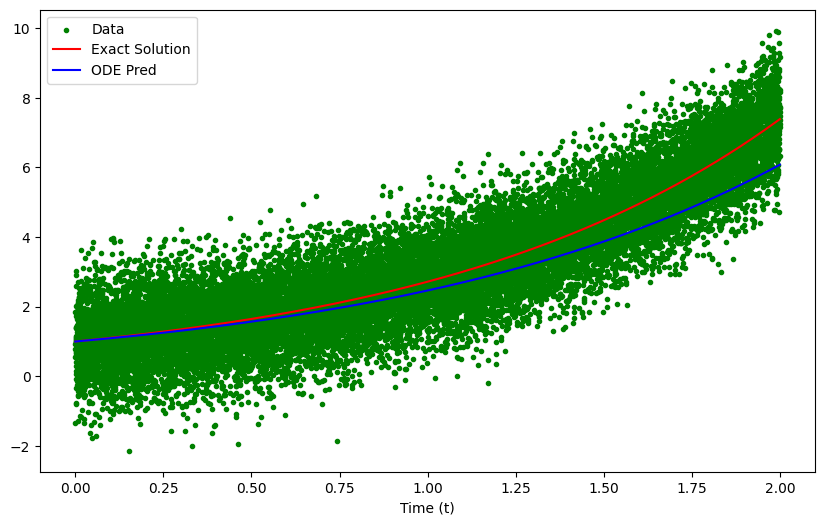

-0.38034247339306987


In [ ]:
# Make ODE Solver with the coef above and then compare to exact solution
# Doesn't work, but something like that
from scipy.integrate import odeint

def ode_first(y, t):
    dydt = -coef[0]*y
    return dydt


y0 = y[0] #y_data[0] # what if the first datapoint is an offlier??? maybe I need a better method... e.g. use y[0]?
                     # yes... just replaced y_data[0] by y[0]: there is the issue of the dependence on initial values... but since I have many data points, I have many initial
                     # values at different times, so I might still be able to average different solutions of different init val and get something correct.
sol0 = odeint(ode_first, y0, t)

plt.figure(figsize=(10, 6))
plt.scatter(t, y_data, color = 'g', label='Data', marker = ".")
plt.plot(t,y,label='Exact Solution',color='r')
plt.plot(t, sol0[:, 0], 'b', label='ODE Pred')
plt.legend(loc='best')
plt.xlabel('Time (t)')
plt.legend()
plt.show()

print(np.mean(sol0[:,0] - y))

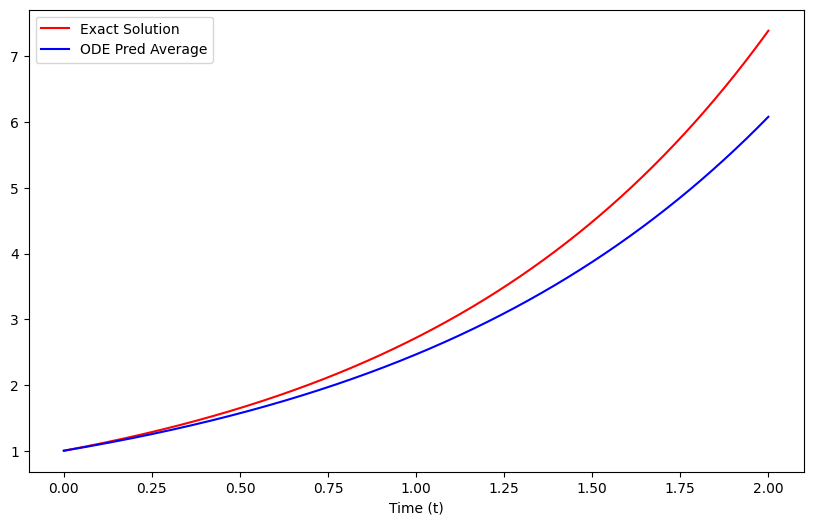

-0.38009899446653905


In [ ]:
y1 = y[1]
t1 = np.delete(t,1)

y2 = y[2]
t2 = np.delete(t1,1)

y3 = y[3]
t3  = np.delete(t2,1)

sol1 = odeint(ode_first, y1, t1)

sol2 = odeint(ode_first, y2, t2)

sol_av = 1/3 * (sol0[2:,:] + sol1[1:,:] + sol2)

plt.figure(figsize=(10, 6))
#plt.plot(t, y_data, 'g', label='Data')
plt.plot(t,y,label='Exact Solution',color='r')
plt.plot(t2, sol_av[:, 0], 'b', label='ODE Pred Average')
plt.legend(loc='best')
plt.xlabel('Time (t)')
plt.legend()
plt.show()

print(np.mean(sol_av[:,0] - np.delete(np.delete(y,1),1)))

In [ ]:
print(np.delete(np.array([1,2,3,4]),))

[1 2 4]
